<a href="https://colab.research.google.com/github/ALFANHANIF23115804/Calcualtor-App/blob/master/students.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
# Mengimpor library yang diperlukan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from google.colab import files

# Meminta pengguna untuk mengunggah file 'students.csv'
print("Silakan unggah file 'students.csv' Anda.")
uploaded = files.upload()

# Memuat data dari file yang diunggah
file_name = next(iter(uploaded))
df = pd.read_csv(file_name)

print("\n--- Data Awal Berhasil Dimuat ---")

Silakan unggah file 'students.csv' Anda.


Saving students.csv to students (2).csv

--- Data Awal Berhasil Dimuat ---


In [12]:
# Memfilter data untuk hanya menyertakan mahasiswa yang sudah ditempatkan
# dan membuat salinannya untuk menghindari SettingWithCopyWarning
placed_df = df[df['Placement Status'] == 'Placed'].copy()

# Menampilkan 5 baris pertama dari data yang sudah difilter
print("Data Mahasiswa yang Ditempatkan (5 Baris Pertama):")
print(placed_df.head())

Data Mahasiswa yang Ditempatkan (5 Baris Pertama):
                              Student ID                 Name   Age  Gender  \
3   1aa67474-e200-4157-ad54-c95aaa4d52a8  Christopher Morales  23.0    Male   
5   28dd6ff3-6391-4421-ba38-3c3164b96252            Siddharth  19.0    Male   
7   1090fccc-de58-401b-9cb7-b64f927e5e08                Rahul  23.0    Male   
10  e87d1c78-e7c4-41c7-8049-7b717d106c60       Anna Henderson  23.0  Female   
12  1750bd26-bcfc-4af5-9881-a1f0fbbb523a                Pooja  23.0  Female   

   Branch  Average GPA  Backlogs  Attendance (%)  \
3     ECE         6.92       2.0           62.26   
5    MECH         7.36       0.0           62.56   
7      IT         6.67       0.0           97.72   
10    EEE         7.17       1.0           73.88   
12  CIVIL         7.50       1.0           99.10   

                                           Clubs  \
3             Coding Club, Entrepreneurship Cell   
5                                    Sports Club   
7   L

In [13]:
print("--- Analisis Korelasi Pearson (Hubungan dengan Gaji/CTC) ---")

# 1. Korelasi antara Rata-rata IPK (Average GPA) dan Gaji (CTC)
pearson_coef_gpa, p_value_gpa = stats.pearsonr(placed_df['Average GPA'], placed_df['CTC (LPA)'])
print(f"\nKoefisien Korelasi untuk IPK: {pearson_coef_gpa:.4f} (P-value: {p_value_gpa:.3e})")

# 2. Korelasi antara Kehadiran (Attendance) dan Gaji (CTC)
pearson_coef_att, p_value_att = stats.pearsonr(placed_df['Attendance (%)'], placed_df['CTC (LPA)'])
print(f"Koefisien Korelasi untuk Kehadiran: {pearson_coef_att:.4f} (P-value: {p_value_att:.3f})")

# 3. Korelasi antara Tunggakan (Backlogs) dan Gaji (CTC)
pearson_coef_back, p_value_back = stats.pearsonr(placed_df['Backlogs'], placed_df['CTC (LPA)'])
print(f"Koefisien Korelasi untuk Tunggakan: {pearson_coef_back:.4f} (P-value: {p_value_back:.3f})")

--- Analisis Korelasi Pearson (Hubungan dengan Gaji/CTC) ---

Koefisien Korelasi untuk IPK: 0.0676 (P-value: 2.996e-02)
Koefisien Korelasi untuk Kehadiran: 0.0370 (P-value: 0.234)
Koefisien Korelasi untuk Tunggakan: -0.0445 (P-value: 0.153)


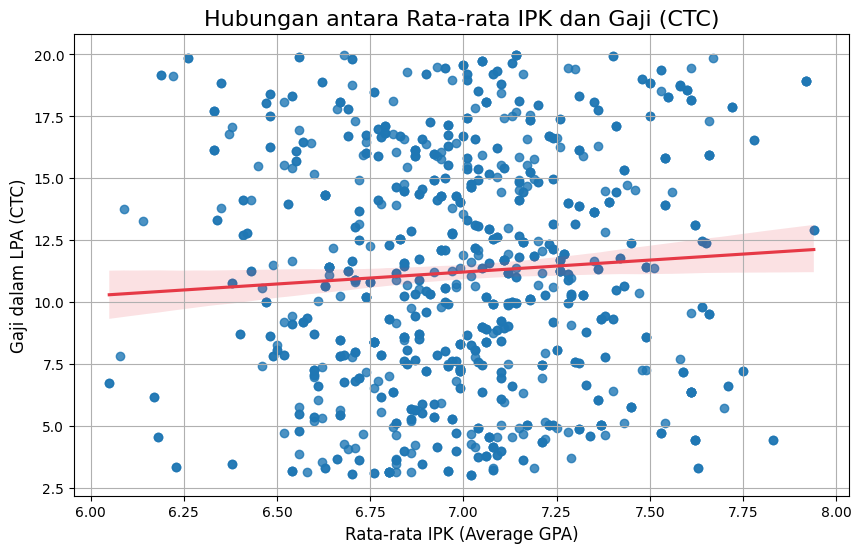

In [14]:
# Membuat scatter plot untuk IPK vs Gaji
plt.figure(figsize=(10, 6))
sns.regplot(x="Average GPA", y="CTC (LPA)", data=placed_df, line_kws={"color":"#E63946"})
plt.title('Hubungan antara Rata-rata IPK dan Gaji (CTC)', fontsize=16)
plt.xlabel('Rata-rata IPK (Average GPA)', fontsize=12)
plt.ylabel('Gaji dalam LPA (CTC)', fontsize=12)
plt.grid(True)
plt.show()

In [15]:
print("\n--- Uji ANOVA: Pengaruh Variabel Kategorikal terhadap Gaji (CTC) ---")

# Variabel kategorikal yang akan diuji
categorical_vars = ['Branch', 'Gender', 'Internship Done']
anova_results = []

for var in categorical_vars:
    # Mengelompokkan data CTC berdasarkan setiap kategori dalam variabel
    groups = [group['CTC (LPA)'].dropna() for name, group in placed_df.groupby(var)]

    # Menjalankan uji ANOVA one-way
    if len(groups) > 1:
        f_val, p_val = stats.f_oneway(*groups)
        anova_results.append((var, f_val, p_val))

# Membuat DataFrame dari hasil ANOVA dan mengurutkannya
anova_df = pd.DataFrame(anova_results, columns=['Variabel', 'F-Value', 'P-Value'])
anova_df_sorted = anova_df.sort_values('P-Value')

print(anova_df_sorted.to_string(index=False))


--- Uji ANOVA: Pengaruh Variabel Kategorikal terhadap Gaji (CTC) ---
       Variabel  F-Value  P-Value
         Branch 1.936421 0.085757
Internship Done 2.492394 0.114705
         Gender 0.943913 0.331502


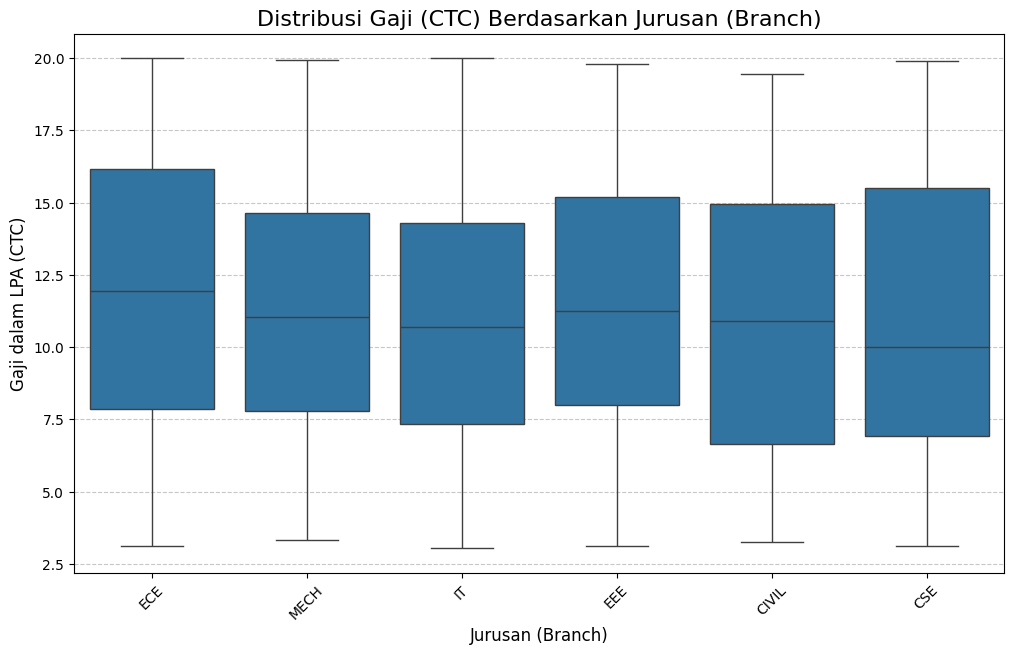

In [16]:
# Membuat Box Plot untuk melihat distribusi gaji di setiap jurusan
plt.figure(figsize=(12, 7))
sns.boxplot(x='Branch', y='CTC (LPA)', data=placed_df)

# Menambahkan judul dan label untuk kejelasan
plt.title('Distribusi Gaji (CTC) Berdasarkan Jurusan (Branch)', fontsize=16)
plt.xlabel('Jurusan (Branch)', fontsize=12)
plt.ylabel('Gaji dalam LPA (CTC)', fontsize=12)
plt.xticks(rotation=45) # Memutar label jurusan agar tidak tumpang tindih
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

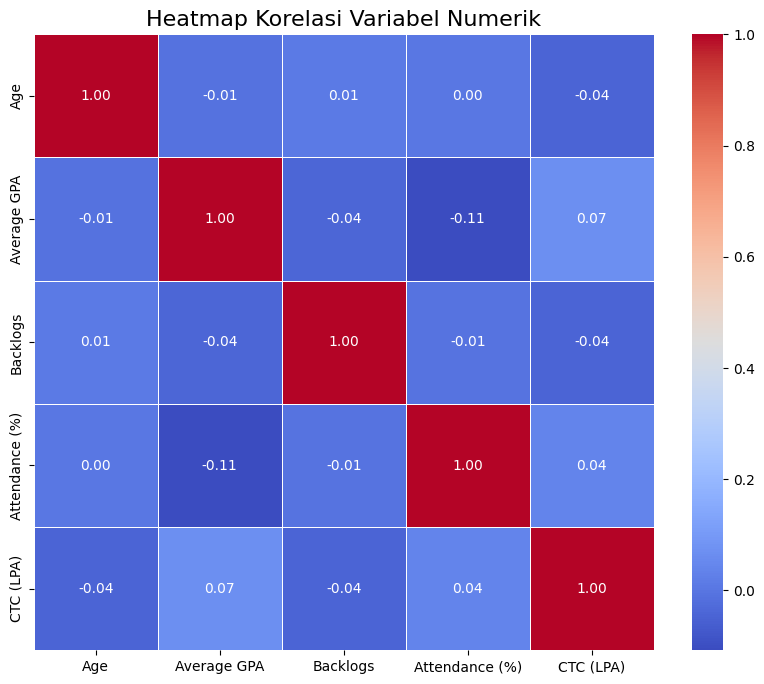

In [17]:
# Memilih hanya kolom numerik yang relevan untuk heatmap
numerical_cols = ['Age', 'Average GPA', 'Backlogs', 'Attendance (%)', 'CTC (LPA)']
corr_matrix = placed_df[numerical_cols].corr()

# Membuat visualisasi heatmap dari matriks korelasi
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

# Menambahkan judul
plt.title('Heatmap Korelasi Variabel Numerik', fontsize=16)
plt.show()

--- Uji ANOVA: Pengaruh Domain Penempatan terhadap Gaji (CTC) ---
Hasil Uji ANOVA untuk 'Placement Domain':
F-Value: 2.0103
P-Value: 7.475e-02
Kesimpulan: Tidak ada perbedaan gaji yang signifikan secara statistik antar domain penempatan.


/tmp/ipython-input-18-4102962284.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Placement Domain', y='CTC (LPA)', data=placed_df, palette='viridis')


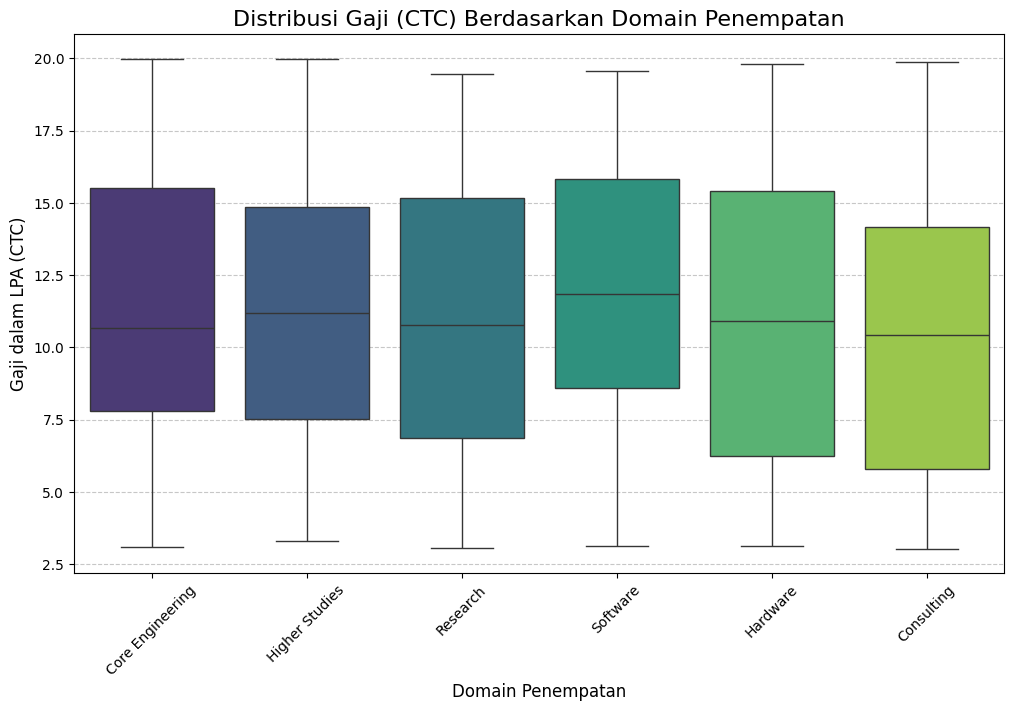

In [18]:
print("--- Uji ANOVA: Pengaruh Domain Penempatan terhadap Gaji (CTC) ---")

# Mengelompokkan data CTC berdasarkan setiap domain penempatan
groups = [group['CTC (LPA)'].dropna() for name, group in placed_df.groupby('Placement Domain')]

# Menjalankan uji ANOVA one-way
f_val, p_val = stats.f_oneway(*groups)

print(f"Hasil Uji ANOVA untuk 'Placement Domain':")
print(f"F-Value: {f_val:.4f}")
print(f"P-Value: {p_val:.3e}")

if p_val < 0.05:
    print("Kesimpulan: Terdapat perbedaan gaji yang signifikan secara statistik antar domain penempatan.")
else:
    print("Kesimpulan: Tidak ada perbedaan gaji yang signifikan secara statistik antar domain penempatan.")

# Membuat Box Plot untuk visualisasi
plt.figure(figsize=(12, 7))
sns.boxplot(x='Placement Domain', y='CTC (LPA)', data=placed_df, palette='viridis')

# Menambahkan judul dan label
plt.title('Distribusi Gaji (CTC) Berdasarkan Domain Penempatan', fontsize=16)
plt.xlabel('Domain Penempatan', fontsize=12)
plt.ylabel('Gaji dalam LPA (CTC)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

--- Hasil Model Regresi Linear Sederhana ---
Persamaan Model: CTC = 0.97 * (Average GPA) + 4.46

Nilai R-squared (R²): 0.0046
Artinya, model ini dapat menjelaskan sekitar 0.46% dari variasi data gaji.


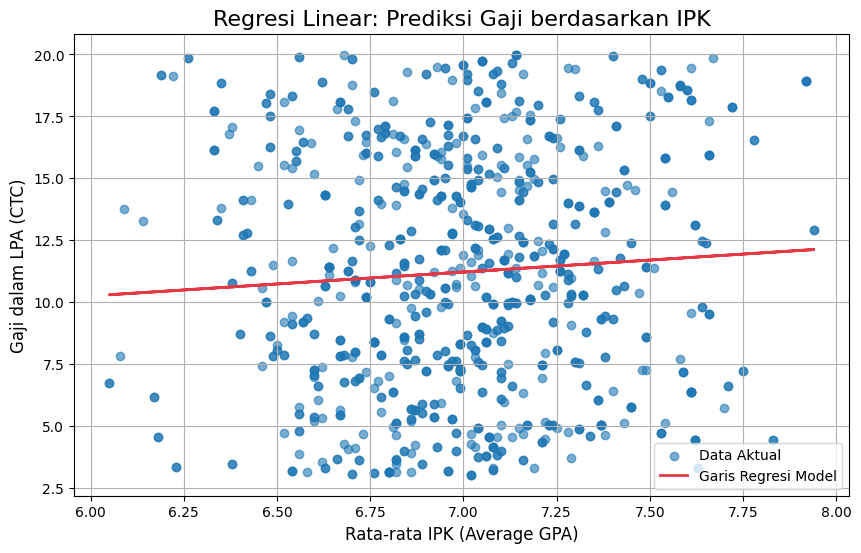

In [19]:
# Mengimpor library untuk model regresi dan metrik evaluasi
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# 1. Menyiapkan variabel
# Variabel independen (X) adalah fitur yang digunakan untuk memprediksi. Harus dalam format 2D.
X = placed_df[['Average GPA']]
# Variabel dependen (y) adalah target yang ingin kita prediksi.
y = placed_df['CTC (LPA)']

# 2. Membuat dan melatih model
# Membuat instance dari model Regresi Linear
model = LinearRegression()

# Melatih model menggunakan data kita (X dan y)
model.fit(X, y)

# 3. Mendapatkan parameter model
intercept = model.intercept_
coefficient = model.coef_[0]

print("--- Hasil Model Regresi Linear Sederhana ---")
print(f"Persamaan Model: CTC = {coefficient:.2f} * (Average GPA) + {intercept:.2f}")

# 4. Mengevaluasi model
# Membuat prediksi menggunakan model yang sudah dilatih
y_pred = model.predict(X)

# Menghitung R-squared (R²) untuk melihat seberapa baik model menjelaskan data
r2 = r2_score(y, y_pred)
print(f"\nNilai R-squared (R²): {r2:.4f}")
print(f"Artinya, model ini dapat menjelaskan sekitar {r2:.2%} dari variasi data gaji.")

# 5. Visualisasi hasil model
plt.figure(figsize=(10, 6))
# Plot titik data asli
plt.scatter(X, y, alpha=0.6, label='Data Aktual')
# Plot garis regresi dari hasil prediksi model
plt.plot(X, y_pred, color='#E63946', linewidth=2, label='Garis Regresi Model')

plt.title('Regresi Linear: Prediksi Gaji berdasarkan IPK', fontsize=16)
plt.xlabel('Rata-rata IPK (Average GPA)', fontsize=12)
plt.ylabel('Gaji dalam LPA (CTC)', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()